# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Satyavira Prathama
- **Email:** viraprathama@gmail.com
- **ID Dicoding:** prathama

## Menentukan Pertanyaan Bisnis


*   Bagaimana pengaruh musim (season) terhadap jumlah sepeda yang disewa?
*   Bagaimana pengaruh hari libur terhadap jumlah sepeda yang disewa?
*   Pada bulan berapakah jumlah sepeda yang disewa tertinggi dan pada bulan berapakah jumlah sepeda yang disewa terendah?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("./data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Kode diatas dijalankan untuk mengambil data csv dari file day.csv dan mengubahnya ke dataframe agar bisa diproses dengan bantuan library pandas.

In [3]:
hour_df = pd.read_csv("./data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Kode diatas dijalankan untuk mengambil data csv dari file hour.csv dan mengubahnya ke dataframe agar bisa diproses dengan bantuan library pandas.

**Insight:**
- Tabel day terdapat 16 kolom dan tabel hour terdapat 17 kolom.
- Untuk tabel hour memiliki tambahan kolom hr.
- Perbedaan dari tabel day dan tabel hour adalah tabel hour merupakan tabel yang lebih rinci daripada tabel day dikarenakan pada tabel day untuk setiap hari hanya satu akan tetapi untuk tabel hour untuk setiap hari akan dibagi lagi menjadi 24 jam.

### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Kode diatas dijalankan untuk mengecek apakah data dalam day_df terdapat missing value dan apakah tipe data telah benar. Bisa dilihat tidak terdapat missing value akan tetapi untuk tipe data terdapat kesalahan pada dteday yang memiliki tipe data yang salah. Akan tetapi selain kolom dteday memiliki tipe data yang benar.

In [5]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Kode diatas dijalankan untuk mengecek apakah terdapat duplikasi data dalam day_df dan ternyata tidak ada duplikasi data didalam day_df.

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Kode diatas dijalankan untuk mengecek apakah nilai yang ada didalam setiap kolom terdapat keanehan contohnya seperti invalid value dan ternyata setelah dijalankan bisa dilihat untuk semua datanya aman.

#### Menilai tabel `hour_df`

In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kode diatas dijalankan untuk mengecek apakah data dalam hour_df terdapat missing value dan apakah tipe data telah benar. Bisa dilihat tidak terdapat missing value akan tetapi untuk tipe data terdapat kesalahan pada dteday yang memiliki tipe data yang salah. Akan tetapi selain kolom dteday memiliki tipe data yang benar.

In [8]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Kode diatas dijalankan untuk mengecek apakah terdapat duplikasi data dalam hour_df dan ternyata tidak ada duplikasi data didalam hour_df.

Kode diatas dijalankan untuk mengecek apakah nilai yang ada didalam setiap kolom terdapat keanehan contohnya seperti invalid value dan ternyata setelah dijalankan bisa dilihat untuk semua datanya aman.

**Insight:**
- Kedua tabel untuk missing value tidak ada.
- Hanya satu kolom yang memiliki kesalahan tipe data untuk kedua tabel.

### Cleaning Data

Tahapan cleaning data yang akan dilakukan adalah hanya mengubah satu kolom dteday untuk tipe datanya menjadi datetime untuk kedua tabel dikarenakan pada tahapan assesing data telah ditemukan bahwa tipe data yang ditampilkan adalah object pada saat data didalam merupakan datetime.

#### Membersihkan tabel `day_df`

In [9]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Kode diatas dijalankan untuk mengubah tipe data dteday dalam day_df dan juga untuk mengecek apakah benar telah terubah

#### Membersihkan tabel `hour_df`

In [10]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kode diatas dijalankan untuk mengubah tipe data dteday dalam hour_df dan juga untuk mengecek apakah benar telah terubah

**Insight:**
- Pada tabel day_df dan tabel hour_df untuk tipe data telah sesuai untuk semua kolom.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [11]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
242,243,2011-08-31,3,0,8,0,3,1,1,0.656667,0.611121,0.597917,0.083333,688,4370,5058
459,460,2012-04-04,2,1,4,0,3,1,1,0.541667,0.533450,0.469583,0.180975,1058,5378,6436
39,40,2011-02-09,1,0,2,0,3,1,2,0.134783,0.144283,0.494783,0.188839,53,1552,1605
315,316,2011-11-12,4,0,11,0,6,0,1,0.356667,0.357942,0.552917,0.212062,1275,2792,4067


Kode diatas digunakan untuk menampilkan 5 sampel random dari day_df

In [12]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Kode diatas digunakan untuk menampilkan rangkuman parameter statistik (mean, median, dll.) dari semua kolom

In [13]:
day_df.groupby(by="season").agg({
    "cnt": ["sum", "mean"]
})

cnt             
            sum         mean
season                      
1        471348  2604.132597
2        918589  4992.331522
3       1061129  5644.303191
4        841613  4728.162921

Dapat diketahui bahwa musim gugur merupakan season yang paling banyak orang menyewa sepeda. Dan yang terendah adalah pada musim semi.

In [14]:
day_df.groupby(by="yr").agg({
    "cnt": "sum"
})

,cnt
yr,
0,1243103
1,2049576


Dapat diketahui bahwa tahun 2012 lebih banyak hampir 100% daripada pada tahun 2011.

In [15]:
day_df.groupby(by="mnth").agg({
    "cnt": ["sum", "mean"]
})

cnt             
         sum         mean
mnth                     
1     134933  2176.338710
2     151352  2655.298246
3     228920  3692.258065
4     269094  4484.900000
5     331686  5349.774194
6     346342  5772.366667
7     344948  5563.677419
8     351194  5664.419355
9     345991  5766.516667
10    322352  5199.225806
11    254831  4247.183333
12    211036  3403.806452

Dapat dilihat bahwa bulan 8 merupakan bulan orang paling banyak menyewa sepeda dan bulan orang paling sedikit menyewa sepeda adalah bulan 1.

In [16]:
day_df.groupby(by=["yr","mnth"]).agg({
    "cnt": "sum"
})

cnt
yr mnth        
0  1      38189
   2      48215
   3      64045
   4      94870
   5     135821
   6     143512
   7     141341
   8     136691
   9     127418
   10    123511
   11    102167
   12     87323
1  1      96744
   2     103137
   3     164875
   4     174224
   5     195865
   6     202830
   7     203607
   8     214503
   9     218573
   10    198841
   11    152664
   12    123713

Pada tahun 2012 bulan orang paling banyak menyewa sepeda adalah bulan 9 dan yang paling sedikit menyewa sepeda adalah bulan 1. Pada tahun 2011 bulan orang paling banyak menyewa sepeda adalah bulan 6 dan yang paling sedikit menyewa sepeda adalah bulan 1.

In [17]:
day_df.groupby(by="holiday").agg({
    "cnt": "mean"
})

,cnt
holiday,
0,4527.104225
1,3735.000000


Bisa dilihat bahwa apabila hari libur maka akan lebih sedikit orang yang menyewa sepeda.

In [18]:
day_df.groupby(by=["mnth","holiday"]).agg({
    "cnt": "mean"
})

cnt
mnth holiday             
1    0        2198.033898
     1        1749.666667
2    0        2674.836364
     1        2118.000000
3    0        3692.258065
4    0        4475.827586
     1        4748.000000
5    0        5359.083333
     1        5070.500000
6    0        5772.366667
7    0        5525.033333
     1        6723.000000
8    0        5664.419355
9    0        5803.551724
     1        4692.500000
10   0        5195.950000
     1        5297.500000
11   0        4308.464286
     1        3389.250000
12   0        3478.433333
     1        1165.000000

Bisa dilihat apabila bukan keseluruhan dataset akan tetapi menjadi bulan maka terdapat 3 bulan dimana hari libur yang memiliki lebih banyak orang yang menyewa sepeda yaitu bulan 4, 7, 10

In [19]:
day_df.groupby(by=["yr","holiday"]).agg({
    "cnt": "mean"
})

cnt
yr holiday             
0  0        3417.129577
   1        3002.200000
1  0        5637.078873
   1        4401.181818

Bisa dilihat apabila bukan keseluruhan dataset akan tetapi menjadi tahun maka rata rata orang yang menyewa sepeda tetap lebih besar pada saat tidak hari libur.

### Explore `hour_df`

In [20]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
3582,3583,2011-06-03,2,0,6,4,0,5,1,1,0.52,0.5000,0.48,0.3284,1,5,6
14003,14004,2012-08-11,3,1,8,16,0,6,0,1,0.80,0.7273,0.46,0.2985,227,304,531
16332,16333,2012-11-18,4,1,11,6,0,0,0,1,0.28,0.2727,0.81,0.1642,2,13,15
12081,12082,2012-05-23,2,1,5,14,0,3,1,1,0.68,0.6364,0.65,0.1343,67,181,248
3210,3211,2011-05-18,2,0,5,16,0,3,1,1,0.60,0.5909,0.73,0.1940,53,241,294


Kode diatas digunakan untuk menampilkan 5 sampel random dari hour_df

In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Kode diatas digunakan untuk menampilkan rangkuman parameter statistik (mean, median, dll.) dari semua kolom

In [22]:
hour_df.groupby(by=["hr"]).agg({
    "cnt": "mean"
})

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


Kode diatas digunakan untuk mengecek rata rata penyewaan sepeda dalam jangka jam dan bisa dilihat bahwa pada jam 17 merupakan penyewaan sepeda paling tinggi dan yang paling rendah adalah jam 4.

**Insight:**
- Dapat diketahui bahwa musim gugur merupakan season yang paling banyak orang menyewa sepeda. Dan yang terendah adalah pada musim semi.

- Dapat diketahui bahwa tahun 2012 lebih banyak hampir 100% daripada pada tahun 2011.

- Dapat dilihat bahwa bulan 8 merupakan bulan orang paling banyak menyewa sepeda dan bulan orang paling sedikit menyewa sepeda adalah bulan 1.

- Pada tahun 2012 bulan orang paling banyak menyewa sepeda adalah bulan 9 dan yang paling sedikit menyewa sepeda adalah bulan 1. Pada tahun 2011 bulan orang paling banyak menyewa sepeda adalah bulan 6 dan yang paling sedikit menyewa sepeda adalah bulan 1.

- Bisa dilihat bahwa apabila keseluruhan dataset hari libur maka akan lebih sedikit orang yang menyewa sepeda.

- Bisa dilihat apabila bukan keseluruhan dataset akan tetapi menjadi bulan maka terdapat 3 bulan dimana hari libur yang memiliki lebih banyak orang yang menyewa sepeda yaitu bulan 4, 7, 10

- Bisa dilihat apabila bukan keseluruhan dataset akan tetapi menjadi tahun maka rata rata orang yang menyewa sepeda tetap lebih besar pada saat tidak hari libur.

- Bisa dilihat bahwa rata rata penyewaan sepeda dalam jangka jam bahwa pada jam 17 merupakan penyewaan sepeda paling tinggi dan yang paling rendah adalah jam 4.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim (season) terhadap jumlah sepeda yang disewa?

In [23]:
season_df = day_df.groupby(by="season").cnt.sum().reset_index()
season_df = season_df.rename(columns={
    "cnt": "total_count"
})
# Menganti nilai season agar lebih bermakna dan mudah dimengerti
season_df = season_df.replace({1: "spring", 2: "summer", 3: "fall", 4: "winter"})
season_df

,season,total_count
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


Pada kode diatas kita membuat sebuah dataframe baru yaitu season_df yang menyimpan musim dan berapa banyak penyewaan sepeda. Sebelum itu mengganti nilai pada kolom season menjadi lebih bermakna dan mudah dimengerti. Dan juga menampilkan tabel season_df setelah dibuat dan bisa dilihat bahwa fall merupakan season yang paling banyak orang menyewakan sepeda. Setelah itu summer, dan setelah itu winter dan yang terakhir adalah spring.

C:\Users\User\AppData\Local\Temp\ipykernel_42792\2836145889.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


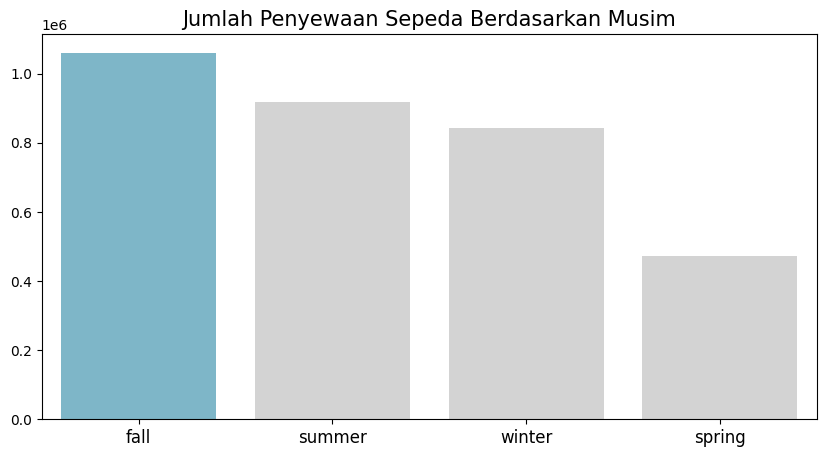

In [24]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="season",
    y="total_count",
    data=season_df.sort_values(by="total_count", ascending=False),
    palette=colors
)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Visualisasi ini merupakan perbandingan banyaknya penyewa sepeda dengan musim. Bisa dilihat dari visualisasi yang dibuat bahwa fall merupakan season yang paling banyak orang menyewakan sepeda. Setelah itu summer, dan setelah itu winter dan yang terakhir adalah spring.

### Pertanyaan 2: Bagaimana pengaruh hari libur terhadap jumlah sepeda yang disewa?

In [25]:
holiday_df = day_df.groupby(by="holiday").cnt.mean().reset_index()
holiday_df = holiday_df.rename(columns={
    "cnt": "total_count"
})
# Menganti nilai holiday agar lebih bermakna dan mudah dimengerti
holiday_df = holiday_df.replace({0: "No Holiday", 1: "Holiday"})
holiday_df

,holiday,total_count
0,No Holiday,4527.104225
1,Holiday,3735.000000


Pada kode diatas kita membuat sebuah dataframe baru yaitu holiday_df yang menyimpan hari libur atau tidak hari libur dan berapa banyak penyewaan sepeda. Sebelum itu mengganti nilai pada kolom holiday menjadi lebih bermakna dan mudah dimengerti. Dan juga menampilkan tabel holiday_df setelah dibuat dan bisa dilihat bahwa pada saat tidak hari libur orang lebih banyak menyewa sepeda.

C:\Users\User\AppData\Local\Temp\ipykernel_42792\781289981.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


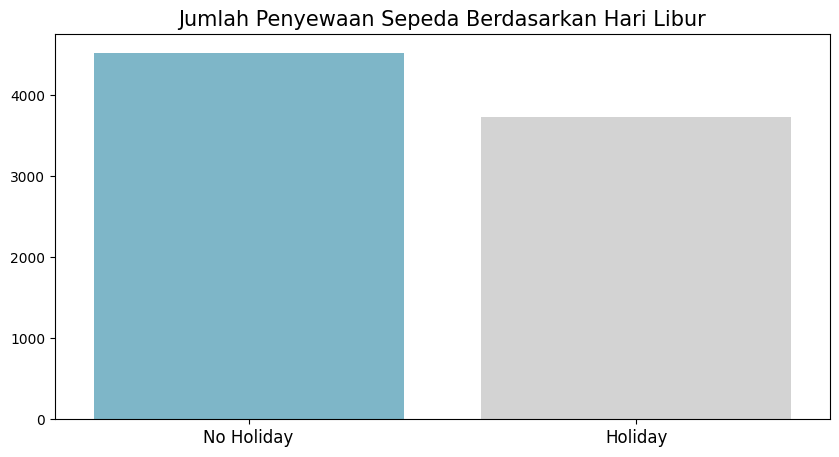

In [26]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3"]

sns.barplot(
    x="holiday",
    y="total_count",
    data=holiday_df.sort_values(by="total_count", ascending=False),
    palette=colors
)
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari Libur", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Visualisasi ini merupakan perbandingan banyaknya penyewa sepeda dengan hari libur atau tidak. Bisa dilihat dari visualisasi yang dibuat bahwa hari tidak libur lebih tinggi daripada hari libur dalam banyaknya penyewa sepeda.

### Pertanyaan 3: Pada bulan berapakah jumlah sepeda yang disewa tertinggi dan pada bulan berapakah jumlah sepeda yang disewa terendah?

In [27]:
month_df = day_df.groupby(by="mnth").cnt.sum().reset_index()
month_df = month_df.rename(columns={
    "cnt": "total_count"
})
# Menganti nilai bulan agar lebih bermakna dan mudah dimengerti
month_df = month_df.replace({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"})
month_df = month_df.rename(
    columns={
        "mnth": "month"
    }
)
month_df

,month,total_count
0,Jan,134933
1,Feb,151352
2,Mar,228920
3,Apr,269094
4,May,331686
5,Jun,346342
6,Jul,344948
7,Aug,351194
8,Sep,345991
9,Oct,322352


Pada kode diatas kita membuat sebuah dataframe baru yaitu month_df yang menyimpan bulan dan berapa banyak penyewaan sepeda. Sebelum itu mengganti nilai pada kolom bulan menjadi lebih bermakna dan mudah dimengerti. Dan juga menampilkan tabel month_df setelah dibuat dan bisa dilihat bahwa pada saat bulan 8 orang lebih banyak menyewa sepeda dan pada bulan 1 orang paling sedikit menyewa sepeda.

C:\Users\User\AppData\Local\Temp\ipykernel_42792\2771246529.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


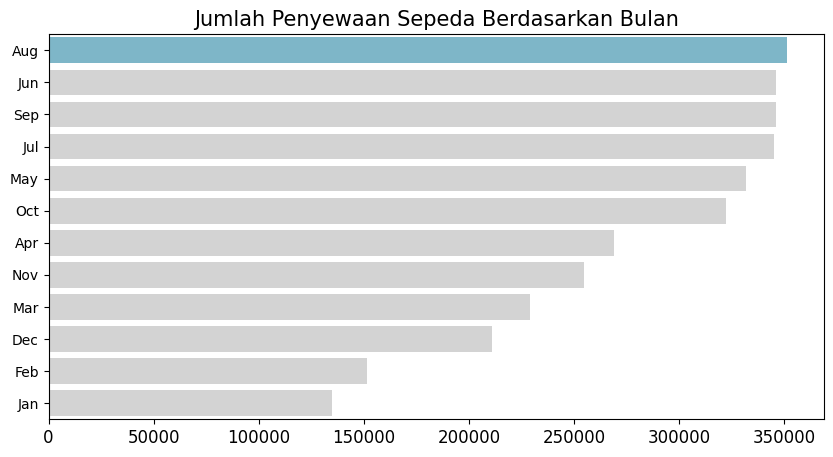

In [28]:
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="total_count",
    y="month",
    data=month_df.sort_values(by="total_count", ascending=False),
    palette=colors
    )
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Bulan", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Visualisasi ini merupakan perbandingan banyaknya penyewa sepeda dengan bulan. Bisa dilihat dari visualisasi yang dibuat bahwa bulan agustus merupakan bulan dimana orang menyewa sepeda paling banyak dan januari merupakan bulan dimana orang menyewa sepeda paling sedikit.

**Insight:**
- Bisa dilihat dari visualisasi yang dibuat bahwa fall merupakan season yang paling banyak orang menyewakan sepeda. Setelah itu summer, dan setelah itu winter dan yang terakhir adalah spring.
- Bisa dilihat dari visualisasi yang dibuat bahwa hari tidak libur lebih tinggi daripada hari libur dalam banyaknya penyewa sepeda.
- Bisa dilihat dari visualisasi yang dibuat bahwa bulan agustus merupakan bulan dimana orang menyewa sepeda paling banyak dan januari merupakan bulan dimana orang menyewa sepeda paling sedikit.

## Analisis Lanjutan

### Clustering (Metode Binning)

Clustering, bertujuan mengelompokkan data ke dalam grup berdasarkan karakteristik tertentu tanpa menggunakan algoritma machine learning dan kali ini saya menggunakan metode clustering bernama binning dan metode binning digunakan untuk membagi data ke dalam interval atau kategori tertentu.
Yang akan saya clustering kali ini adalah windspeed. Disini clustering digunakan untuk mengelompokkan kecepatan angin / windspeed berdasarkan kisaran tertentu. Tujuan saya melakukan clustering pada windspeed adalah untuk proses analisis yang lebih mudah dikarenakan secara visual daripada secara tabel.

In [29]:
clustering_df = day_df[["instant", "windspeed"]]
clustering_df = clustering_df.rename(columns={
    "instant": "no"
})
clustering_df.head()

,no,windspeed
0,1,0.160446
1,2,0.248539
2,3,0.248309
3,4,0.160296
4,5,0.186900


In [30]:
# Mencari batas windspeed
max_windspeed = clustering_df["windspeed"].max()
min_windspeed = clustering_df["windspeed"].min()
print(f"Max windspeed: {max_windspeed}")
print(f"Min windspeed: {min_windspeed}")

Max windspeed: 0.507463
Min windspeed: 0.0223917


In [31]:
# Membuat batas bin berdasarkan batas windspeed
windspeed_bins = np.linspace(min_windspeed, max_windspeed, 6)
windspeed_bins

array([0.0223917 , 0.11940596, 0.21642022, 0.31343448, 0.41044874,
       0.507463  ])

In [32]:
# Membuat nama label bin
windspeed_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Membuat kolom baru dari hasil clustering menggunakan metode binning
clustering_df['windspeed_binned'] = pd.cut(clustering_df['windspeed'], bins=windspeed_bins, labels=windspeed_labels)
clustering_df

,no,windspeed,windspeed_binned
0,1,0.160446,Low
1,2,0.248539,Medium
2,3,0.248309,Medium
3,4,0.160296,Low
4,5,0.186900,Low
...,...,...,...
726,727,0.350133,High
727,728,0.155471,Low
728,729,0.124383,Low
729,730,0.350754,High


Dari beberapa kode diatas telah dilakukan clustering dengan metode binning yang membagikan windspeed menjadi 5 dan terdiri dari Very Low, Low, Medium, High, Very High. Dan cara pembagiannya menjadi kelima kategori tersebut adalah menggunakan metode yang terdapat didalam numpy yaitu linspace yang akan mengembalikan angka yang diberi jarak secara merata pada interval yang diberikan. Untuk spesifik pembagiannya adalah untuk very low adalah 0.0223917 sampai 0.11940596, low adalah 0.11940596 sampai 0.21642022, medium adalah 0.21642022 sampai 0.31343448, high adalah 0.31343448 sampai 0.41044874, dan very high adalah 0.41044874 sampai 0.507463.


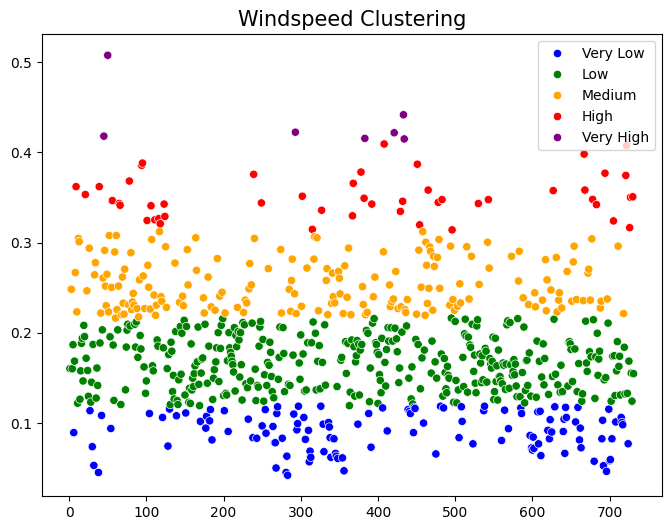

In [33]:
plt.figure(figsize=(8, 6))
color_palette = {
    'Very Low': 'blue',        # You can choose any color
    'Low': 'green',
    'Medium': 'orange',
    'High': 'red',
    'Very High': 'purple'
}

sns.scatterplot(
    x="no",
    y="windspeed",
    hue="windspeed_binned",
    data=clustering_df,
    palette=color_palette
)
plt.title("Windspeed Clustering", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks(fontsize=10)
plt.legend(title="", loc="upper right")
plt.show()

Visualisasi ini merupakan hubungan diantara instant dan windspeed. Instant disini adalah nomor baris dari data. Bisa dilihat dari visualisasi yang dibuat bahwa pada saat kategori low terdapat lebih banyak yang menyewa sepeda dan yang paling sedikit adalah pada saat windspeed adalah very high. Dan juga bisa dilihat dibagi menjadi lima warna sesuai dengan pembagian dengan cara binning.

## Conclusion

- Conclusion pertanyaan 1: Terdapat pengaruh musim terhadap jumlah sepeda yang disewa. Dan bisa dilihat bahwa fall merupakan season yang paling banyak orang menyewakan sepeda. Setelah itu summer, dan setelah itu winter dan yang terakhir adalah spring.
- Conclution pertanyaan 2: Terdapat pengaruh hari libur terhadap jumlah sepeda yang disewa dan hasil yang didapatkan adalah pada saat hari libur orang lebih sedikit menyewa sepeda.
- Conclution pertanyaan 3: Pada bulan agustus merupakan bulan dimana orang menyewa sepeda paling banyak dan januari merupakan bulan dimana orang menyewa sepeda paling sedikit.

In [34]:
day_df.to_csv("main_data.csv", index=False)